# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

#Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'

#Data Loading from Drive

In [ ]:
import pandas as pd

#https://drive.google.com/file/d/1v54nqQoexM00y0X6CqkEwV_aHIPMq11r/view?usp=sharing
file_id = '1v54nqQoexM00y0X6CqkEwV_aHIPMq11r'
url = f'https://drive.google.com/uc?export=download&id={file_id}'


df = pd.read_csv(url)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

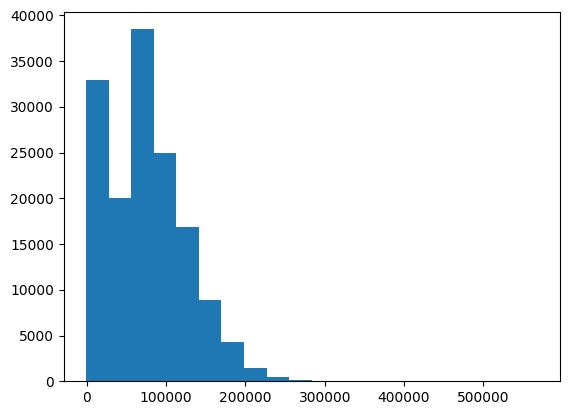

In [ ]:
plt.hist(df['TotalPay'],bins=20)
plt.show()

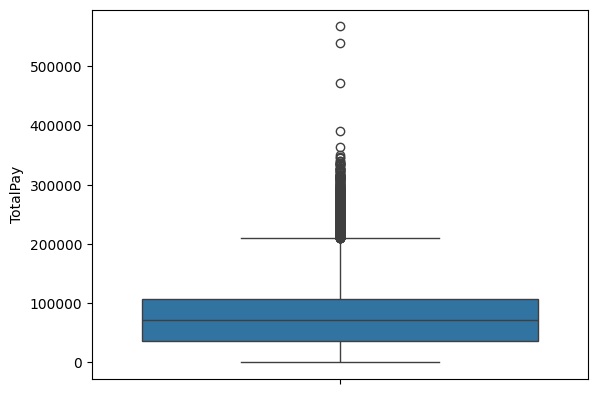

In [ ]:
sns.boxplot(df['TotalPay'])
plt.show()

In [ ]:
q1=df['TotalPay'].quantile(.25)
q3=df['TotalPay'].quantile(.75)
print(q1,q3)

36168.995 105839.135


In [ ]:
df_2=df[(df['TotalPay']<q3) & (df['TotalPay']>q1)]

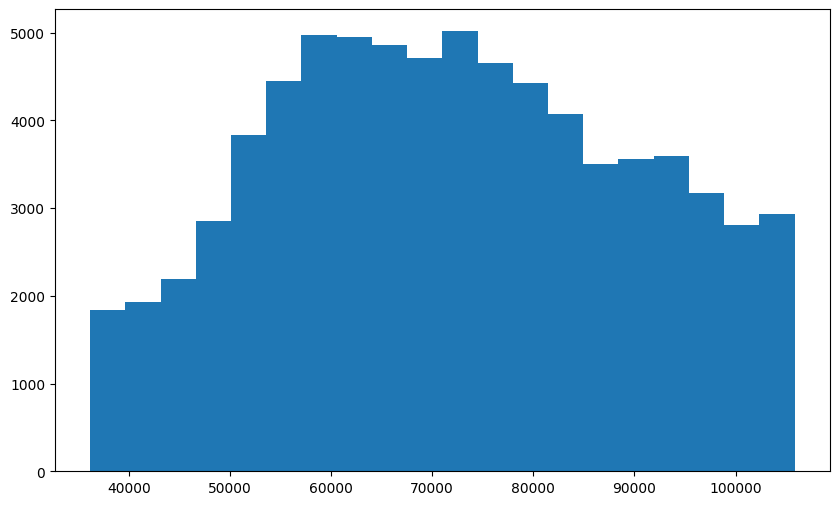

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_2['TotalPay'],bins=20)
plt.show()

In [ ]:
df_2["JobTitle"].value_counts().index

Index(['Transit Operator', 'Custodian', 'TRANSIT OPERATOR',
       'Patient Care Assistant', 'Special Nurse', 'General Laborer',
       'Registered Nurse', 'Gardener', 'Porter', 'Parking Control Officer',
       ...
       'STUDENT DESIGN TRAINEE 1/ARC-ENG-PLNG',
       'SENIOR EMPLOYEE RELATIONS REPRESENTATIVE', 'MORGUE ATTENDANT',
       'PRINCIPAL RECREATION SUPERVISOR', 'ANIMAL HEALTH TECHNICIAN',
       'VETERNIARY LABORATORY TECHNOLOGIST', 'Sewer Repair Supervisor',
       'Mobile Equipment Supervisor', 'STUDENT DESIGN TRAINEE 3/ARC-ENG-PLNG',
       'Audiometrist'],
      dtype='object', name='JobTitle', length=1782)

In [ ]:
lb1=LabelEncoder()
lb1.fit(df_2["JobTitle"].value_counts().index)

LabelEncoder()

In [ ]:
df_2["JobTitle"]=lb1.transform(df_2["JobTitle"])

<ipython-input-12-2781b26ae3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["JobTitle"]=lb1.transform(df_2["JobTitle"])


In [ ]:
df_2.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
8298,8299,KENNETH MA,1654,67412.48,32307.81,6108.64,NaN,105828.93,105828.93,2011,NaN,San Francisco,NaN
8299,8300,RICHARD TRUONG,1654,67581.32,36299.04,1946.45,NaN,105826.81,105826.81,2011,NaN,San Francisco,NaN
8300,8301,CURTIS MCMILLAN,523,105826.01,0.00,0.00,NaN,105826.01,105826.01,2011,NaN,San Francisco,NaN
8301,8302,ROSE BALTAZAR,1269,95157.31,5889.28,4769.75,NaN,105816.34,105816.34,2011,NaN,San Francisco,NaN
8302,8303,STEPHEN SOLNIT,729,100039.24,0.00,5775.01,NaN,105814.25,105814.25,2011,NaN,San Francisco,NaN


-------------------------------------------------------------------------

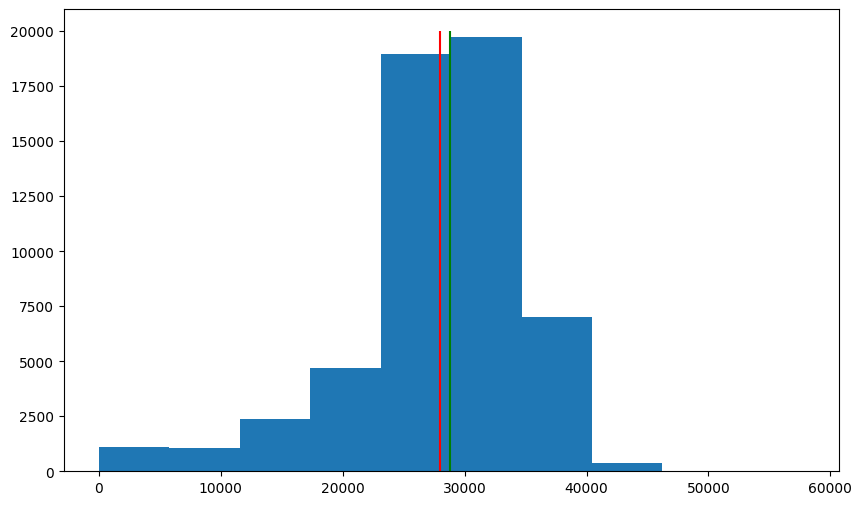

In [ ]:
plt.figure(figsize=(10,6))
plt.vlines(df_2['Benefits'].mean(),0,20000,color='red')
plt.vlines(df_2['Benefits'].median(),0,20000,color='green')
plt.hist(df_2['Benefits'])
plt.show()

In [ ]:
df_2['Benefits'].fillna(df_2['Benefits'].median(),inplace=True)

<ipython-input-15-1888a2f35fbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Benefits'].fillna(df_2['Benefits'].median(),inplace=True)


In [ ]:
df_2.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
8298,8299,KENNETH MA,1654,67412.48,32307.81,6108.64,28778.17,105828.93,105828.93,2011,NaN,San Francisco,NaN
8299,8300,RICHARD TRUONG,1654,67581.32,36299.04,1946.45,28778.17,105826.81,105826.81,2011,NaN,San Francisco,NaN
8300,8301,CURTIS MCMILLAN,523,105826.01,0.00,0.00,28778.17,105826.01,105826.01,2011,NaN,San Francisco,NaN
8301,8302,ROSE BALTAZAR,1269,95157.31,5889.28,4769.75,28778.17,105816.34,105816.34,2011,NaN,San Francisco,NaN
8302,8303,STEPHEN SOLNIT,729,100039.24,0.00,5775.01,28778.17,105814.25,105814.25,2011,NaN,San Francisco,NaN


In [ ]:
df_2['Agency'].value_counts()

Agency
San Francisco    74326
Name: count, dtype: int64

In [ ]:
df_2.drop('Agency',axis=1,inplace=True)

<ipython-input-18-5a090339b855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('Agency',axis=1,inplace=True)


In [ ]:
df_2.drop('Notes',axis=1,inplace=True)

<ipython-input-19-535fd6bfa7fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('Notes',axis=1,inplace=True)


In [ ]:
df_2.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
8298,8299,KENNETH MA,1654,67412.48,32307.81,6108.64,28778.17,105828.93,105828.93,2011,NaN
8299,8300,RICHARD TRUONG,1654,67581.32,36299.04,1946.45,28778.17,105826.81,105826.81,2011,NaN
8300,8301,CURTIS MCMILLAN,523,105826.01,0.00,0.00,28778.17,105826.01,105826.01,2011,NaN
8301,8302,ROSE BALTAZAR,1269,95157.31,5889.28,4769.75,28778.17,105816.34,105816.34,2011,NaN
8302,8303,STEPHEN SOLNIT,729,100039.24,0.00,5775.01,28778.17,105814.25,105814.25,2011,NaN


In [ ]:
df_2.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                12
OvertimePay             0
OtherPay                0
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Status              74326
dtype: int64

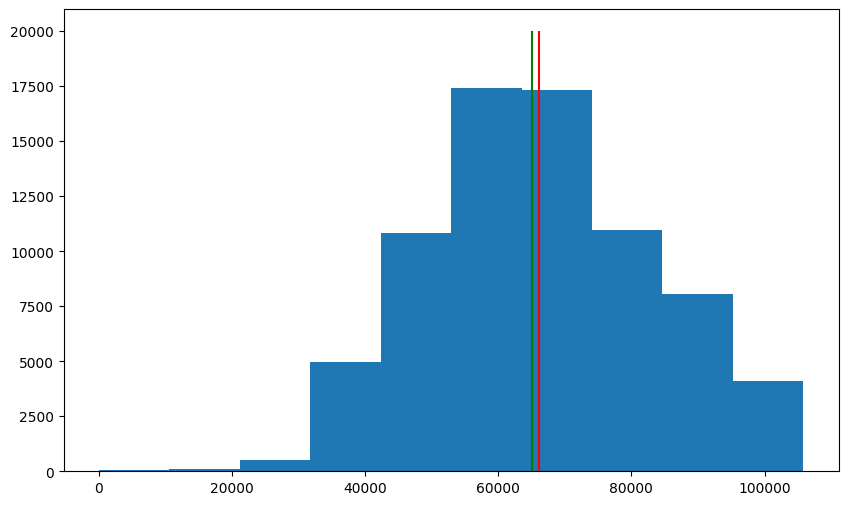

In [ ]:
plt.figure(figsize=(10,6))
plt.vlines(df_2['BasePay'].mean(),0,20000,color='red')
plt.vlines(df_2['BasePay'].median(),0,20000,color='green')
plt.hist(df_2['BasePay'])
plt.show()

In [ ]:
df_2['BasePay'].fillna(df_2['BasePay'].median(),inplace=True)

<ipython-input-23-d2d5d012c5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['BasePay'].fillna(df_2['BasePay'].median(),inplace=True)


In [ ]:
df_2.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits                0
TotalPay                0
TotalPayBenefits        0
Year                    0
Status              74326
dtype: int64

In [ ]:
df_2['Status'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df_2.drop('Status',axis=1,inplace=True)
df_2.drop('EmployeeName',axis=1,inplace=True)

<ipython-input-26-ec8174265886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('Status',axis=1,inplace=True)
<ipython-input-26-ec8174265886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop('EmployeeName',axis=1,inplace=True)


In [ ]:
df_2.head()

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
8298,8299,1654,67412.48,32307.81,6108.64,28778.17,105828.93,105828.93,2011
8299,8300,1654,67581.32,36299.04,1946.45,28778.17,105826.81,105826.81,2011
8300,8301,523,105826.01,0.00,0.00,28778.17,105826.01,105826.01,2011
8301,8302,1269,95157.31,5889.28,4769.75,28778.17,105816.34,105816.34,2011
8302,8303,729,100039.24,0.00,5775.01,28778.17,105814.25,105814.25,2011


In [ ]:
df_2.min()

Id                   8299.00
JobTitle                0.00
BasePay                 0.00
OvertimePay            -0.01
OtherPay            -7058.59
Benefits                0.00
TotalPay            36169.28
TotalPayBenefits    36169.28
Year                 2011.00
dtype: float64

---------------------------------------------------------

In [ ]:
x_data=df_2.iloc[:,[0,1,2,3,4,5,7,8]]

In [ ]:
x_data

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
8298,8299,1654,67412.48,32307.81,6108.64,28778.17,105828.93,2011
8299,8300,1654,67581.32,36299.04,1946.45,28778.17,105826.81,2011
8300,8301,523,105826.01,0.00,0.00,28778.17,105826.01,2011
8301,8302,1269,95157.31,5889.28,4769.75,28778.17,105816.34,2011
8302,8303,729,100039.24,0.00,5775.01,28778.17,105814.25,2011
...,...,...,...,...,...,...,...,...
139860,139861,472,36266.18,0.00,0.00,362.66,36628.84,2014
139861,139862,577,36265.00,0.00,0.00,362.65,36627.65,2014
139867,139868,1026,8030.66,7860.01,20320.03,362.11,36572.81,2014
139884,139885,1564,35142.18,69.15,1166.11,0.00,36377.44,2014


In [ ]:
y_data=df_2.iloc[:,[5]]

In [ ]:
y_data["Benefits"].head()

8298    28778.17
8299    28778.17
8300    28778.17
8301    28778.17
8302    28778.17
Name: Benefits, dtype: float64

In [ ]:
import numpy as np
bins=np.linspace(y_data.min(),y_data.max(),20)

In [ ]:
label=pd.cut(y_data["Benefits"],bins=bins,labels=[i for i in range(1,21)])

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
label.value_counts()

Benefits
9     31588
10    10221
11     9541
8      6293
12     5032
7      2644
6      2050
13     1991
5      1462
4       912
0       785
3       532
2       522
1       334
14      320
15       51
16       32
18       10
17        3
19        3
Name: count, dtype: int64

In [ ]:
(-y_data.min()+y_data.max())/20

TotalPay    5338.8495
dtype: float64

In [ ]:
x=y_data.min()
x_2=0
y=1
for i in ['l1','l2','l3','l4','l5','l6','l7','l8','l9','l10','l11','l12','l13','l14','l15','l16','l17','l18','l19','l20']:
  x=x+5339.849499999999
  y_data[(y_data<=x )& (y_data>=x_2) ]=y
  y=y+1
  x_2+=(-y_data.min()+y_data.max())/20

<ipython-input-503-53a79bf32136>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data[(y_data<=x )& (y_data>=x_2) ]=y
<ipython-input-503-53a79bf32136>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data[(y_data<=x )& (y_data>=x_2) ]=y
<ipython-input-503-53a79bf32136>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y

In [ ]:
y_data.value_counts()

TotalPay
7.0         7660
9.0         7491
8.0         7415
10.0        7051
6.0         6948
11.0        6401
13.0        5384
12.0        5372
5.0         5074
4.0         3012
14.0        2959
3.0         1924
15.0        1389
2.0         1261
17.0        1062
18.0         985
16.0         974
19.0         856
20.0         744
1.0          364
Name: count, dtype: int64

------------------------------------------------------------------------

In [ ]:
scalar=MinMaxScaler()
df_3=scalar.fit_transform(x_data)

In [ ]:
df_3

array([[0.00000000e+00, 1.78493450e-01, 1.00000000e+00, ...,
        6.26017549e-01, 9.99942009e-01, 0.00000000e+00],
       [7.39043677e-06, 6.19541485e-01, 8.45940447e-01, ...,
        6.26017549e-01, 9.99567601e-01, 0.00000000e+00],
       [1.47808735e-05, 7.13973799e-01, 9.55692790e-01, ...,
        6.26017549e-01, 9.99160651e-01, 0.00000000e+00],
       ...,
       [9.99985219e-01, 6.43013100e-01, 2.36376745e-01, ...,
        2.82702896e-01, 3.54814652e-04, 1.00000000e+00],
       [9.99992610e-01, 5.40393013e-02, 2.12356256e-01, ...,
        3.53391148e-01, 1.54830259e-04, 1.00000000e+00],
       [1.00000000e+00, 5.78602620e-01, 3.28386109e-01, ...,
        9.71791693e-03, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
x_data

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
3823,3824,327,132871.15,0.00,0.00,28107.90,132871.15,2011
3824,3825,1135,112401.08,19374.72,1062.10,28107.90,132837.90,2011
3825,3826,1308,126984.00,4395.60,1422.16,28107.90,132801.76,2011
3826,3827,1135,117303.68,3302.60,12195.37,28107.90,132801.65,2011
3827,3828,1135,112421.26,11627.97,8751.00,28107.90,132800.23,2011
...,...,...,...,...,...,...,...,...
139129,139130,1614,40727.25,1163.87,1785.33,436.75,44113.20,2014
139130,139131,884,28098.67,0.00,725.64,15287.49,44111.80,2014
139131,139132,1178,31407.65,0.00,0.00,12693.23,44100.88,2014
139132,139133,99,28216.02,0.00,0.00,15867.10,44083.12,2014


In [ ]:
c=x_data.columns
print(df_3.shape,c)

(74326, 8) Index(['Id', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
       'TotalPayBenefits', 'Year'],
      dtype='object')


In [ ]:
df_3=pd.DataFrame(df_3,columns=c)

In [ ]:
df_3.head()

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,0.000000,0.178493,1.000000,1.647129e-07,0.051380,0.626018,0.999942,0.0
1,0.000007,0.619541,0.845940,3.191267e-01,0.059111,0.626018,0.999568,0.0
2,0.000015,0.713974,0.955693,7.240135e-02,0.061732,0.626018,0.999161,0.0
3,0.000022,0.619541,0.882838,5.439824e-02,0.140152,0.626018,0.999159,0.0
4,0.000030,0.619541,0.846092,1.915278e-01,0.115080,0.626018,0.999143,0.0


In [ ]:
df_3['Year'].value_counts()

Year
0.000000    22309
0.333333    17470
0.666667    17292
1.000000    17255
Name: count, dtype: int64

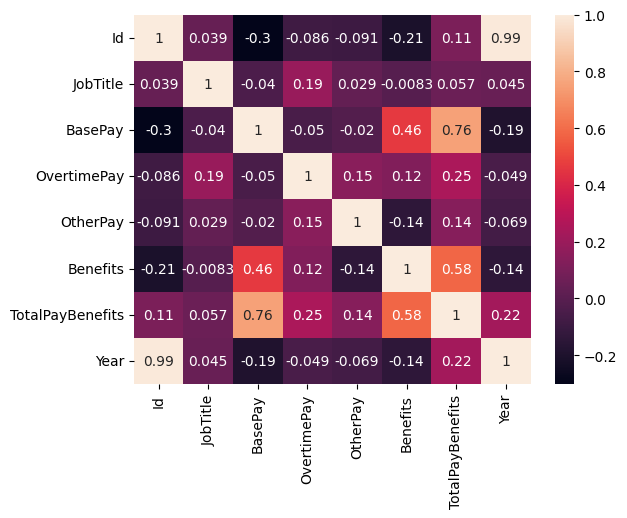

In [ ]:
sns.heatmap(df_3.corr(),annot=True)
plt.show()

id==year

In [ ]:
df_3.drop('Id',axis=1,inplace=True)

In [ ]:
df_3.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year
0,0.178493,1.000000,1.647129e-07,0.051380,0.626018,0.999942,0.0
1,0.619541,0.845940,3.191267e-01,0.059111,0.626018,0.999568,0.0
2,0.713974,0.955693,7.240135e-02,0.061732,0.626018,0.999161,0.0
3,0.619541,0.882838,5.439824e-02,0.140152,0.626018,0.999159,0.0
4,0.619541,0.846092,1.915278e-01,0.115080,0.626018,0.999143,0.0


<Axes: >

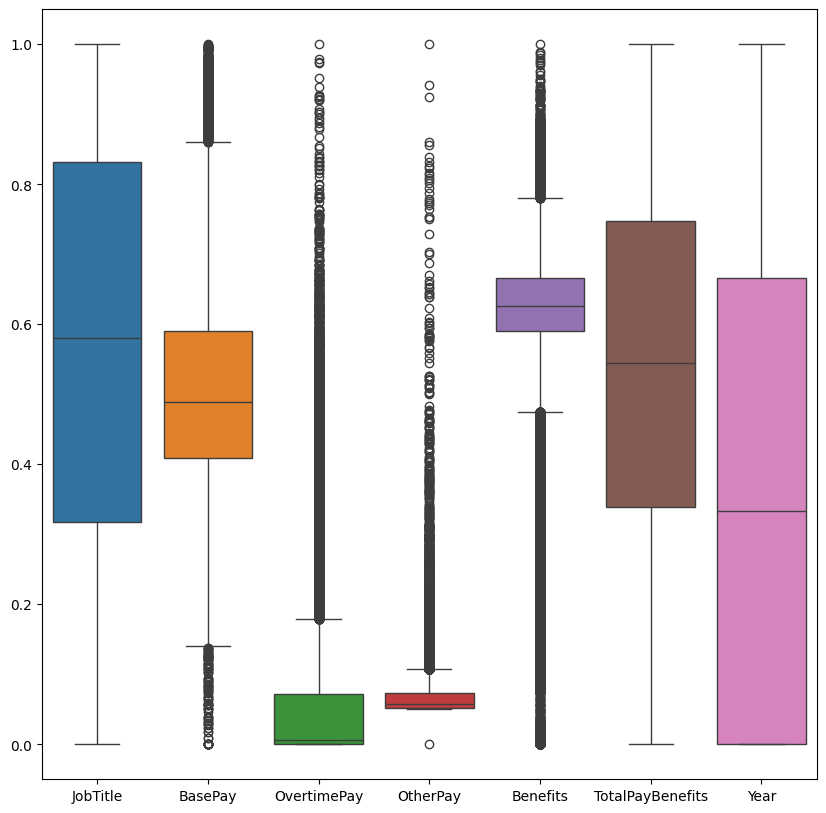

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df_3)


In [ ]:

'''for i in [1,2,3,4]:
  q1=df_3.iloc[:,i].quantile(.25)
  q3=df_3.iloc[:,i].quantile(.75)
  print(q1,q3)
  df_3.iloc[:,i]=df_3.iloc[:,i].where(df_3.iloc[:,i]>q3,other=df_3.iloc[:,i].mean())
  df_3.iloc[:,i]=df_3.iloc[:,i].where(df_3.iloc[:,i]<q1,other=df_3.iloc[:,i].mean())'''

'for i in [1,2,3,4]:\n  q1=df_3.iloc[:,i].quantile(.25)\n  q3=df_3.iloc[:,i].quantile(.75)\n  print(q1,q3)\n  df_3.iloc[:,i]=df_3.iloc[:,i].where(df_3.iloc[:,i]>q3,other=df_3.iloc[:,i].mean())\n  df_3.iloc[:,i]=df_3.iloc[:,i].where(df_3.iloc[:,i]<q1,other=df_3.iloc[:,i].mean())'

In [ ]:
import numpy as np

for i in range(1, 5):
    q1 = df_3.iloc[:, i].quantile(0.25)
    q3 = df_3.iloc[:, i].quantile(0.75)
    df_3.iloc[:, i] = np.where(df_3.iloc[:, i] > q3, df_3.iloc[:, i].mean(), df_3.iloc[:, i])
    df_3.iloc[:, i] = np.where(df_3.iloc[:, i] < q1, df_3.iloc[:, i].mean(), df_3.iloc[:, i])

In [ ]:
df_3.iloc[:,1].value_counts()

BasePay
0.503090    18582
0.455720    18582
0.411700      338
0.414131      297
0.492567      153
            ...  
0.566436        1
0.449949        1
0.454768        1
0.489779        1
0.418996        1
Name: count, Length: 26995, dtype: int64

<Axes: >

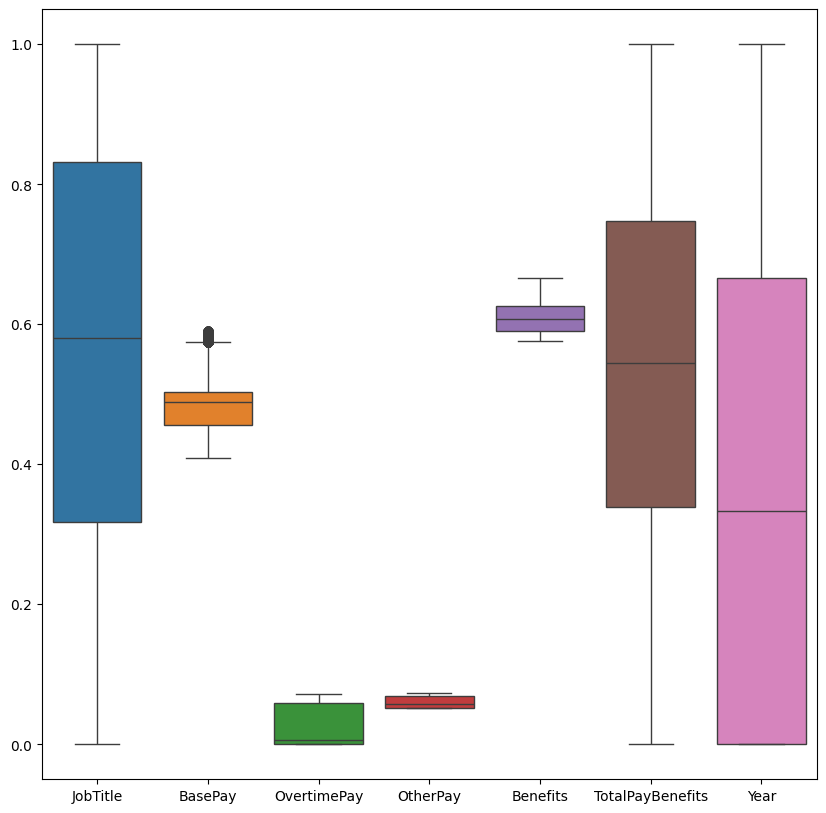

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df_3)


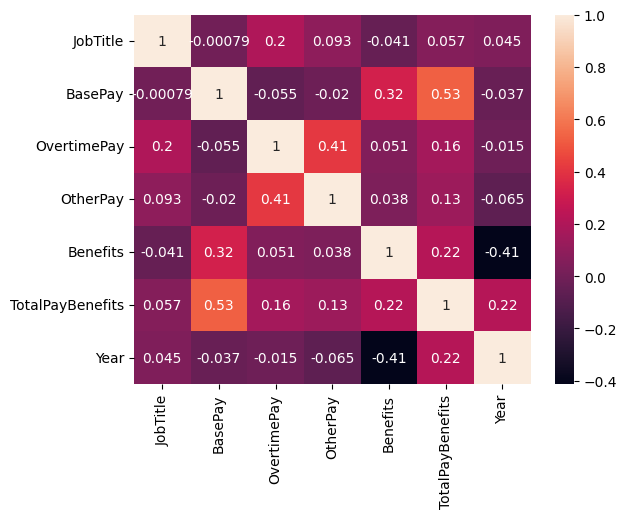

In [ ]:
sns.heatmap(df_3.corr(),annot=True)
plt.show()

#Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_3.shape

(74326, 7)

In [ ]:
y_data.shape

(74326, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_3,y_data,test_size=0.2,random_state=42)

#Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,f1_score,accuracy_score


In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
dt2=DecisionTreeClassifier()

#training

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hate1=dt.predict(x_test)

In [ ]:
y_hate1

array([15.,  9., 10., ..., 10., 11.,  6.])

In [ ]:
y_test

,TotalPay
8391,15.0
17072,9.0
128211,10.0
90590,10.0
85588,13.0
...,...
101139,4.0
98844,5.0
15582,10.0
14550,11.0


#Evaluation

In [ ]:
mean_squared_error(y_test,y_hate1)

0.19568142069151084

In [ ]:
r2_score(y_test,y_hate1)

0.9863921494534272

In [ ]:
y_hate2=dt2.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_hate2)

0.22918068074801562

In [ ]:
r2_score(y_test,y_hate2)

0.984062582739026

In [ ]:
accuracy_score(y_test,y_hate2)

0.8728642540024216

In [ ]:
accuracy_score(y_test,y_hate1)

0.8816090407641598